# Preview SMD Results from LAMMPS Simulation

In [2]:
# Import necessary packages.
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Create a directory to store files generated by this notebook.
out_path = "smd_analysis_output"
if not os.path.exists(out_path):
    os.mkdir(out_path)

In [25]:
# Read the SMD_Results file into a pandas DataFrame.
fpath = "smd_simulation/SMD_results"
colnames = ['Step','F_x', 'F_y', 'F_z', 'F_tot','R_spring','Ref_dist','PMF']
smd_df = pd.read_csv(fpath,skiprows=[0,1],header=None,names=colnames,delimiter='\s+')

# Create a column that is the change in distance between the reference atoms.
Ref_dist_initial = smd_df.Ref_dist[0]
smd_df['change_ref_dist'] = smd_df.Ref_dist - smd_df.Ref_dist[0]

# Convert force values from kcal/mol/A to pN by 69.5 pN = 1kcal/mol/A
fcols = ['F_x','F_y','F_z','F_tot']
for f in fcols:
    smd_df[f] = smd_df[f]*69.5

15.8278


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2910793/720934124.py:4: SyntaxWarning: invalid escape sequence '\s'
  smd_df = pd.read_csv(fpath,skiprows=[0,1],header=None,names=colnames,delimiter='\s+')


In [28]:
# Preview the Pandas DataFrame.
smd_df.head()

,Step,F_x,F_y,F_z,F_tot,R_spring,Ref_dist,PMF,change_ref_dist
0,10100,0.000000,0.00000,0.000000,0.00000,15.8178,15.8278,0.00000,0.0000
1,10200,267.763345,-969.69875,629.223115,1186.47620,14.8178,15.6814,8.66324,-0.1464
2,10300,482.364055,-1743.58820,1174.619500,2156.07070,13.8178,15.3796,32.99120,-0.4482
3,10400,438.971730,-1965.64765,1379.019000,2435.89855,12.8178,14.5839,67.32870,-1.2439
4,10500,451.704825,-2257.37390,1646.739950,2818.60030,11.8178,13.8641,104.67800,-1.9637


## Plot Total Force on the Spring Versus Displacement Between the Reference Atoms

<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_2910793/636430137.py:4: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('change_ref_dist ($\AA$)')


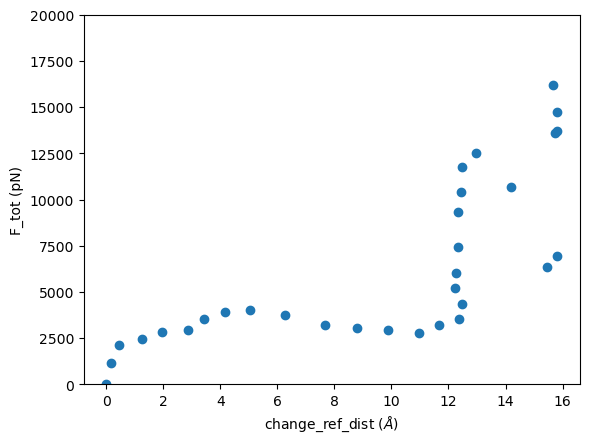

In [36]:
fig, ax = plt.subplots()
ax.scatter(-smd_df.change_ref_dist, smd_df.F_tot)
plt.ylabel('F_tot (pN)')
plt.xlabel('change_ref_dist ($\AA$)')
plt.ylim([0,20000])
plt.show()

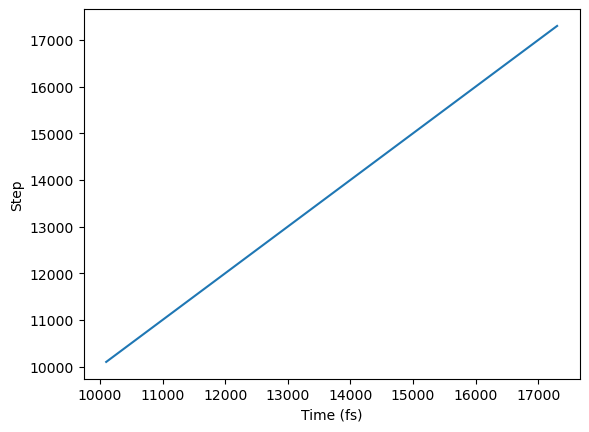

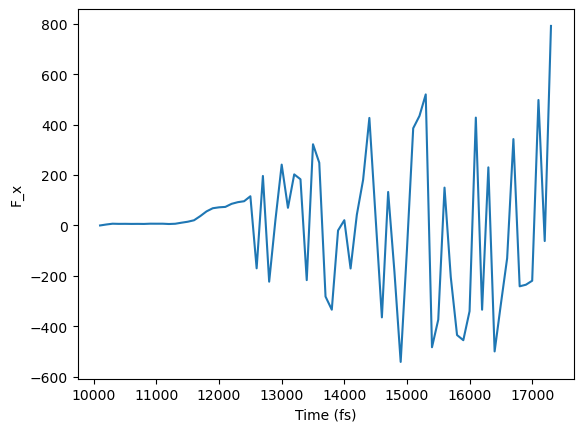

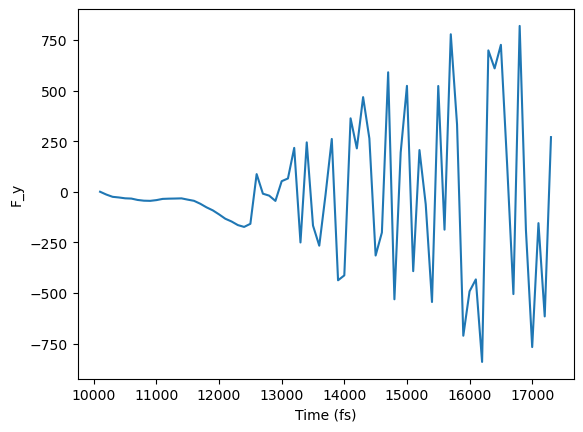

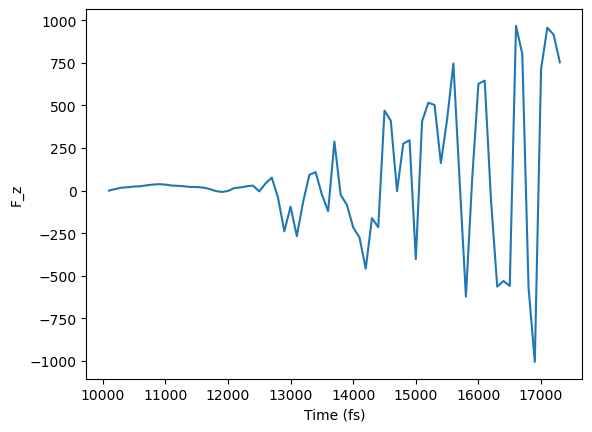

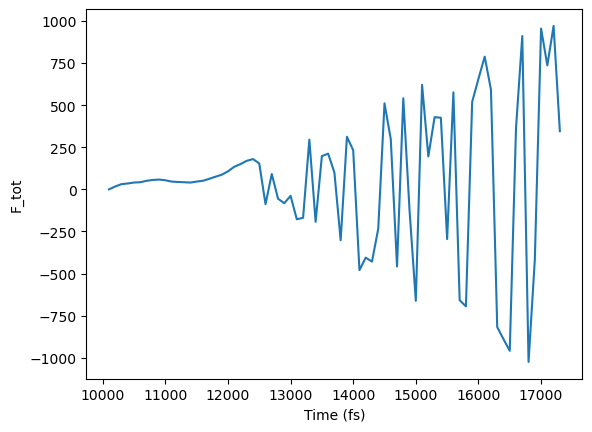

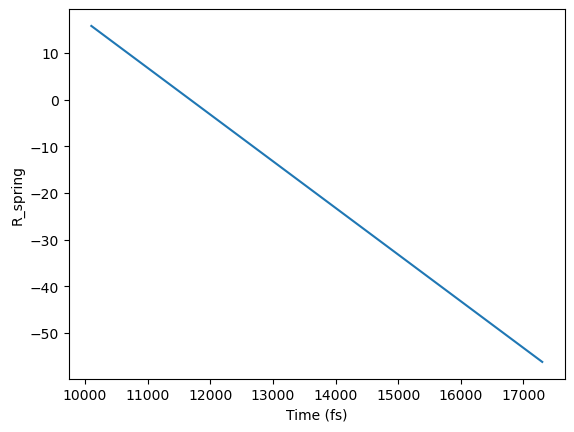

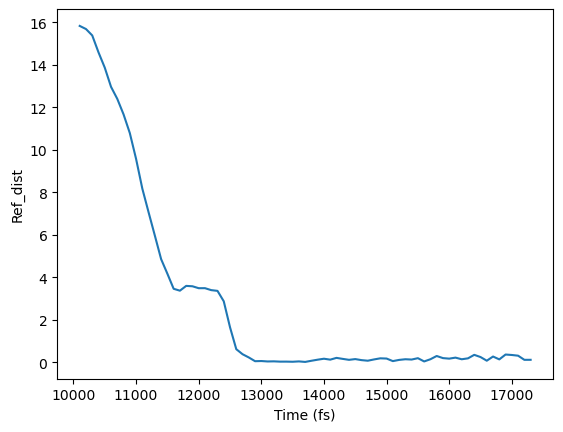

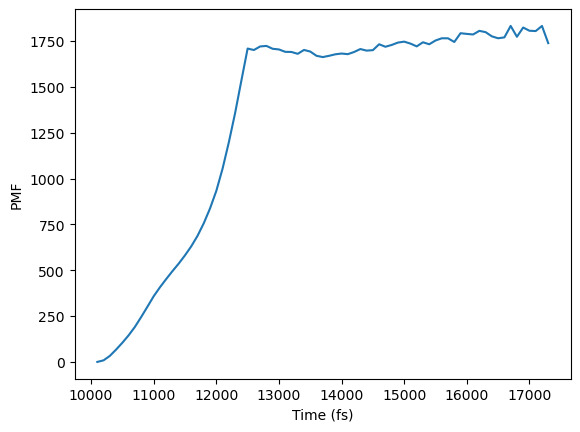

In [13]:
# Plot all columns as a function of time.
for col in smd_df.columns:
    fig, ax = plt.subplots()
    ax.plot(smd_df.Step,smd_df[col])
    plt.xlabel('Time (fs)')
    plt.ylabel(col)
    plt.show()